In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("titanic-train.csv")

In [3]:
df = pd.DataFrame(data)
df1 = df.copy()

In [4]:
df1.head()
###EMBARKED-
#C = Cherbourg, Q = Queenstown, S = Southampton
df1.drop('PassengerId',axis=1,inplace=True)

In [28]:
### Swapping the survived column with the last column
col_list = list(df1.columns)
survived = col_list.pop(10)
col_list.insert(9,survived)
df1 = df1[col_list]
df1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare,Cabin,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,7.2500,NaN,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,71.2833,C85,1,1
2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,7.9250,NaN,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,53.1000,C123,1,1
4,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,8.0500,NaN,3,0


In [29]:
### Looking for the missing values
missing = df1.isna().sum()
missing

Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Embarked      2
Fare          0
Cabin       687
Pclass        0
Survived      0
dtype: int64

In [30]:
# df1.describe()
df1.shape

(891, 11)

In [31]:
### Dropping the cabin columns because of massive amounts of null values
df1.drop("Cabin",axis=1,inplace=True)
df1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,53.1000,1,1
4,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,8.0500,3,0


In [32]:
### Out of the peaple who survived,how many of them were male and female??
gender = df1.groupby("Sex").mean()
gender

,Age,SibSp,Parch,Fare,Pclass,Survived
Sex,,,,,,
female,27.915709,0.694268,0.649682,44.479818,2.159236,0.742038
male,30.726645,0.429809,0.235702,25.523893,2.389948,0.188908


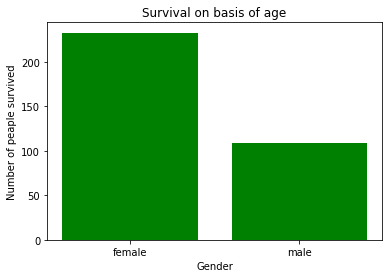

In [33]:
### PLotting the results of survival on the basis of gender
sex = ["female","male"]
survived = df1.groupby("Sex").sum()["Survived"]
plt.bar(sex,survived,color="green")
plt.xlabel("Gender")
plt.ylabel("Number of peaple survived")
plt.title("Survival on basis of age")
plt.show()

In [34]:
df1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,53.1000,1,1
4,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,8.0500,3,0


In [35]:
### Dealing with the null values in Age
age = df1[df1.Age.isna() == True]
age

,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare,Pclass,Survived
5,"Moran, Mr. James",male,NaN,0,0,330877,Q,8.4583,3,0
17,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,S,13.0000,2,1
19,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,C,7.2250,3,1
26,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,C,7.2250,3,0
28,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,Q,7.8792,3,1
...,...,...,...,...,...,...,...,...,...,...
859,"Razi, Mr. Raihed",male,NaN,0,0,2629,C,7.2292,3,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,S,69.5500,3,0
868,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,S,9.5000,3,0
878,"Laleff, Mr. Kristo",male,NaN,0,0,349217,S,7.8958,3,0


In [36]:
### Replacing the null values in age with the mean values
df1["Age"] = df1.Age.fillna(df1.Age.mean())
age_null = df1.Age.isna().sum()
age_null

0

In [39]:
### Dealing with age zero
df1.loc[df1["Age"] == 0,"Age"] = df1.Age.mean().astype("int32")

In [40]:
### Visualising the chances of survial on the basis of age
df1["Age"] = df1["Age"].astype("int32")
# df1.head()
Age = df1.groupby("Age").sum()
Age

,SibSp,Parch,Fare,Pclass,Survived
Age,,,,,
1,13,11,210.0417,19,5
2,21,13,375.3625,26,3
3,11,8,154.6917,15,5
4,16,14,295.4333,26,7
5,7,5,90.8708,11,4
...,...,...,...,...,...
66,0,0,10.5000,2,0
70,1,1,89.2500,6,0
71,0,0,84.1584,2,0


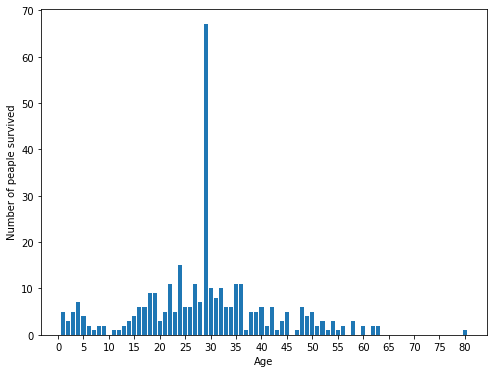

In [41]:
### Visualisation 
ages = np.array(df1["Age"].unique())
ages = np.sort(ages)
survival = df1.groupby("Age").sum()["Survived"]
plt.figure(figsize=(8,6))
plt.xticks(np.arange(0,90,5))
plt.bar(ages,survival)
plt.xlabel("Age")
plt.ylabel("Number of peaple survived")
plt.show()

In [42]:
df1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,S,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,C,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,S,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,S,53.1000,1,1
4,"Allen, Mr. William Henry",male,35,0,0,373450,S,8.0500,3,0


In [58]:
### Which ticket class should I choose so that my chances of survival can increase
# df1.Pclass.unique()
tclass = df1.groupby("Pclass").mean()
tclass

,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,
1,37.078704,0.416667,0.356481,84.154687,0.629630
2,30.277174,0.402174,0.380435,20.662183,0.472826
3,26.368635,0.615071,0.393075,13.675550,0.242363


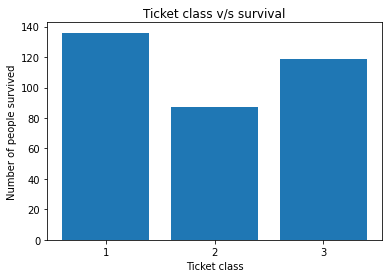

In [63]:
### Visualising the results of class vs survival chances
# cls = np.array(df1.Pclass.unique())
# cls = np.sort(cls)
cls = ["1","2","3"]
survived = df1.groupby("Pclass").sum()["Survived"]
plt.bar(cls,survived)
plt.xlabel("Ticket class")
plt.ylabel("Number of people survived")
plt.title("Ticket class v/s survival")
plt.show()

In [56]:
df1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,S,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,C,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,S,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,S,53.1000,1,1
4,"Allen, Mr. William Henry",male,35,0,0,373450,S,8.0500,3,0


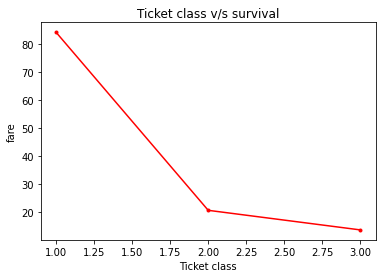

In [60]:
### Checking the corelation of fair v/s ticket class
cls = np.array(df1.Pclass.unique())
cls = np.sort(cls)
fare = df1.groupby("Pclass").mean()["Fare"]
plt.plot(cls,fare,"r.-")
plt.xlabel("Ticket class")
plt.ylabel("fare")
plt.title("Ticket class v/s survival")
plt.show()

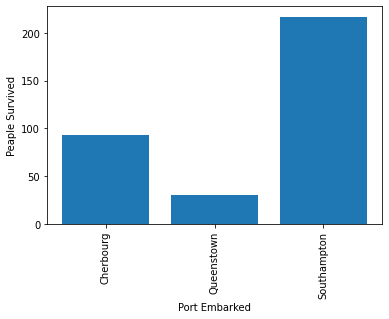

In [67]:
### Does the port embarked from matter in chances of survival??
port = df1.groupby("Embarked").sum()["Survived"]
cls = ["Cherbourg","Queenstown","Southampton"]
plt.bar(cls,port)
plt.xticks(cls,rotation="vertical")
plt.xlabel("Port Embarked")
plt.ylabel("Peaple Survived")
plt.show()

In [68]:
df1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,S,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,C,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,S,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,S,53.1000,1,1
4,"Allen, Mr. William Henry",male,35,0,0,373450,S,8.0500,3,0


In [69]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

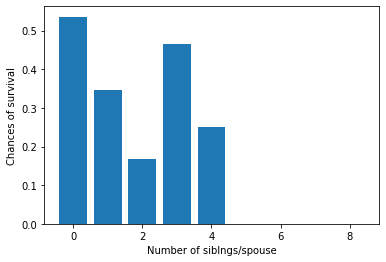

In [75]:
### In siblings/spouses travelling together what is the average number of siblings/spouse actually survived out of them??
sib = df1.groupby("SibSp").mean()["Survived"]
number = df.SibSp.unique()
plt.bar(number,sib)
plt.xlabel("Number of siblngs/spouse")
plt.ylabel("Chances of survival")
plt.show()

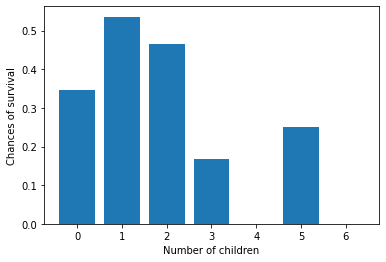

In [76]:
### Same for parent and children
par = df1.groupby("Parch").mean()["Survived"]
number = df.Parch.unique()
plt.bar(number,sib)
plt.xlabel("Number of children")
plt.ylabel("Chances of survival")
plt.show()